In [1]:
import sys
sys.executable

'/home/ec2-user/anaconda/envs/veliadash/bin/python'

In [2]:
from tqdm import tqdm
import pandas as pd
import seaborn as sns
import json
from app import *
from plotting import *

2023-07-05 23:06:38.553 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2023-07-05 23:06:38.555 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2023-07-05 23:06:38.556 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2023-07-05 23:06:38.557 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2023-07-05 23:06:38.558 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2023-07-05 23:06:38.559 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2023-07-05 23:06:38.560 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2023-07-05 23:06:38.562 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2023-07-

In [22]:
de_metadata = pd.read_csv('../data/cancer_types.txt', names=['tcga_name', 'tcga_code'])
de_metadata['tcga_code'] = de_metadata.apply(lambda x: x.tcga_code.strip(), axis=1)
de_metadata.set_index('tcga_code', inplace=True)

In [24]:
json.dumps(de_metadata.to_dict()['tcga_name'])

'{"ACC": "Adrenocortical carcinoma", "BLCA": "Bladder urothelial carcinoma", "LGG": "Brain lower grade glioma", "BRCA": "Breast invasive carcinoma", "CESC": "Cervical squamous cell carcinoma and endocervical adenocarcinoma", "COAD": "Colon adenocarcinoma", "ESCA": "Esophageal carcinoma", "GBM": "Glioblastoma multiforme", "HNSC": "Head and Neck squamous cell carcinoma", "KICH": "Kidney Chromophobe", "KIRC": "Kidney clear cell carcinoma", "KIRP": "Kidney papillary cell carcinoma", "LAML": "Acute Myeloid Leukemia", "LIHC": "Liver hepatocellular carcinoma", "LUAD": "Lung adenocarcinoma", "LUSC": "Lung squamous cell carcinoma", "MESO": "Mesothelioma", "OV": "Ovarian serous cystadenocarcinoma", "PAAD": "Pancreatic adenocarcinoma", "PCPG": "Pheochromocytoma and Paraganglioma", "PRAD": "Prostate adenocarcinoma", "READ": "Rectum adenocarcinoma", "SARC": "Sarcoma", "SKCM": "Skin Cutaneous Melanoma", "STAD": "Stomach adenocarcinoma", "TGCT": "Testicular germ cell tumors", "THCA": "Thyroid carcino

In [2]:
    xena_expression = pd.read_parquet(os.path.join(CACHE_DIR, 'xena.parq'))
    xena_metadata = xena_expression[xena_expression.columns[:6]]
    xena_expression = xena_expression[xena_expression.columns[6:]]
    vtx_id_to_transcripts = load_jsonlines_table(os.path.join(CACHE_DIR, 'sorf_table.jsonlines'), index_col='vtx')
    # Map VTX to transcript ids
    transcript_to_vtx_id = {}
    for ix, row in vtx_id_to_transcripts.iterrows():
        for val in row['transcripts_exact']:
            transcript_to_vtx_id[val] = ix
    # Sum transcripts for VTX id
    xena_vtx_sums = xena_expression.T.copy()
    xena_vtx_sums = xena_vtx_sums.loc[xena_vtx_sums.index.intersection(transcript_to_vtx_id.keys())]
    # Need to average/sum in nominal space not log space
    xena_vtx_sums = np.exp2(xena_vtx_sums)
    xena_vtx_sums['vtx_id'] = xena_vtx_sums.apply(lambda x: transcript_to_vtx_id[x.name], axis=1)
    xena_vtx_sums = xena_vtx_sums.groupby('vtx_id').aggregate(np.sum).T
    xena_vtx_sums = np.log2(xena_vtx_sums)
    # return xena_metadata, xena_expression, vtx_id_to_transcripts, xena_vtx_sums

100%|██████████| 794/794 [00:00<00:00, 157459.92it/s]
/home/ec2-user/anaconda/envs/veliadash/lib/python3.11/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: overflow encountered in exp2
  result = func(self.values, **kwargs)


In [3]:
import plotly.express as px

In [16]:
import ast


In [22]:
def convert_list_string(x):
    l = list(map(float, x.strip('][').split(',')))
    return l

In [42]:
def load_phylocsf_data():
    pcsf = pd.read_csv(f"../data/interim_phase1to6_all_phylocsf-vals_20230628.csv", index_col=0)
    pcsf['phylocsf_vals'] = pcsf['phylocsf_vals'].apply(convert_list_string)
    pcsf = pcsf[['phylocsf_58m_avg', 'phylocsf_58m_max',
           'phylocsf_58m_min', 'phylocsf_58m_std', 'phylocsf_vals']]
    return pcsf

In [95]:
phylocsf_dataframe.loc['VTX-0852656']

KeyError: 'VTX-0852656'

In [93]:
protein_features_df['VTX-0852656']

Deepsig          CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC
SignalP 6slow    CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC
SignalP 5b       CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC
SignalP 4.1      CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC
Phobius          OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO

In [72]:
    sorf_excel_df = load_sorf_excel()
    kibby = load_kibby_results(sorf_excel_df)
    protein_features_df = load_protein_feature_string_representations()
    phylocsf_dataframe = load_phylocsf_data()
    esmfold = load_esmfold()
    vtx_id = 'VTX-0850284'

In [73]:
sorf_aa_seq = sorf_excel_df[sorf_excel_df['vtx_id']==vtx_id]['aa'].iloc[0]

In [83]:
def plot_sequence_line_plots_altair(vtx_id, sorf_aa_seq, phylocsf_dataframe, kibby, esmfold):
    phylo_array = phylocsf_dataframe.loc[vtx_id, 'phylocsf_vals'][::3]
    kib = kibby.loc[vtx_id, 'conservation']
    plddt = esmfold[sorf_aa_seq]['plddt']
    rows = []
    for (j_key, j_vals) in {'PhyloCSF': phylo_array, 'plDDT': plddt, 'Kibby Conservation': kib}.items():
        for i, i_val in enumerate(j_vals):
            rows.append((j_key, i, i_val))
    cons_altair_table = pd.DataFrame(rows, columns = ['Tool', 'Position', 'value'])
    return alt.Chart(cons_altair_table).mark_line().encode(x='Position:N',
                                                           y='value:Q', color='Tool:O').facet('Tool:O', columns=1)


alt.FacetChart(...)

In [171]:
table = pd.read_parquet('../data/sequence_features_strings.parq')
orf_features = table.T['VTX-0461122']
orf_features = orf_features.apply(lambda x: [*x])
seq = orf_features.pop('Sequence')
orf_features


feature_data = pd.DataFrame(index = seq)
for i in orf_features.index:
    feature_data[i] = orf_features[i]
feature_data.T
feature_data = feature_data.T
feature_data.loc['Sequence'] = range(len(feature_data.columns))
feature_data['Tool'] = feature_data.index
feature_data

,M,R,F,K,K,I,V,L,V,I,L,C,S,T,L,Q,V,I,L,H,Q,E,K,A,P,N,I,L,T,T,I,Q,H,F,Q,Tool
Deepsig,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,Deepsig
SignalP 6slow,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,SignalP 6slow
SignalP 5b,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,O,O,O,O,O,O,O,O,O,O,O,O,O,O,SignalP 5b
SignalP 4.1,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,SignalP 4.1
Phobius,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,O,O,O,O,O,O,O,O,O,O,O,O,O,O,Phobius
DeepTMHMM,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,O,O,O,O,O,O,O,O,O,O,O,DeepTMHMM
Sequence,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,Sequence


In [ ]:
feature_heatmap_options = {
    'tooltip': {
        'position': 'top'
    },
    'grid': {
        'height': '50%',
        'top': '10%'
    },
    'xAxis': {
        'type': 'category',
        'data': seq,
        'splitArea': {
            'show': True
        }
    },
    'yAxis': {
        'type': 'category',
        'data': orf_features.index,
        'splitArea': {
            'show': True
        }
    },
    'visualMap': {
        'min': 0,
        'max': 10,
        'calculable': True,
        'orient': 'horizontal',
        'left': 'center',
        'bottom': '15%'
    },
    'series': [
        {
            'name': 'Punch Card',
            'type': 'heatmap',
            'data': orf_features.values,
            'label': {
                'show': True
            },
            'emphasis': {
                'itemStyle': {
                    'shadowBlur': 10,
                }
            }
        }
    ]
}

    

In [97]:
c = {'I': 0, 'C': 0, 'S': 1, 'M': 2, 'O': 3}
orf_features = orf_features.apply(lambda x: [c[i] for i in x])
orf_features

Deepsig          [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
SignalP 6slow    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
SignalP 5b       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
SignalP 4.1      [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
Phobius          [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
DeepTMHMM        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
Name: VTX-0461122, dtype: object

In [108]:
import random

In [264]:
def format_protein_feature_strings_for_altair_heatmap(orf_string_table, vtx_id):
    orf_features = orf_string_table.T[vtx_id]
    orf_features = orf_features.apply(lambda x: [*x])
    seq = orf_features.pop('Sequence')
    values = []
    for i, (ix, row) in enumerate(orf_features.items()):
        for j, v in enumerate(row):
            values.append([j, ix, v, seq[j]])
    df = pd.DataFrame(values, columns = ['Position', 'Tool', 'Predicted Class', 'aa'])
    return df

def altair_protein_features_plot(df):
    color_dict = {
        'S': 'palegoldenrod',
        'C': 'lightgray',
        'I': 'lightgray',
        'O': 'lightblue'
    }
    
    color_scale = alt.Scale(domain=list(color_dict.keys()), range=list(color_dict.values()))

    base = alt.Chart(df).encode(
        alt.X('Position:O'),
        alt.Y('Tool:O')
    )
    fig = base.mark_rect().encode(
        color=alt.Color('Predicted Class:N', scale=color_scale, legend=alt.Legend(
        orient='none',
        legendX=130, legendY=-40,
        direction='horizontal',
        titleAnchor='middle')),
        tooltip = ['Position'])
    return fig+base.mark_text(baseline='middle').encode(alt.Text('aa:O'))

In [265]:
import altair as alt
import pandas as pd
altair_protein_features_plot(df)

alt.LayerChart(...)

In [133]:
from pyecharts.charts import Bar, HeatMap
from pyecharts.charts import Boxplot
from pyecharts import options as opts
import pandas as pd
from pyecharts.faker import Faker

from gapminder import gapminder
heatfig = (
    HeatMap(init_opts={'visualMap': {'min': 0, 'max': 3}})
    .add_xaxis(seq)
    .add_series(name = 'hi')
    # .add_yaxis("Protein Features",  yaxis_data = orf_features.index, value = values)
    # .set_global_opts(visualmap_opts=opts.VisualMapOpts())
)
heatfig.render()

AttributeError: 'HeatMap' object has no attribute 'add_series'

In [126]:
orf_features.to_list()

[[1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3],
 [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3],
 [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3],
 [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3],
 [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3],
 [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,


In [70]:
%matplotlib notebook

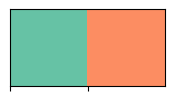

In [21]:
set2 = sns.color_palette('Set2', n_colors=2)
sns.palplot(set2)

In [28]:
    xena_metadata_df, xena_exp_df, vtx_id_to_transcripts = load_xena_tcga_gtex_target()
    transcript_to_vtx_id = {}

    for ix, row in vtx_id_to_transcripts.iterrows():
        for val in row['transcripts_exact']:
            transcript_to_vtx_id[val] = ix
    
    # xena_exp_df = xena_exp_df.T.copy()
    # xena_exp_df = xena_exp_df.loc[xena_exp_df.index.intersection(transcript_to_vtx_id.keys())]
    # xena_exp_df['vtx_id'] = xena_exp_df.apply(lambda x: transcript_to_vtx_id[x.name], axis=1)
    # xena_exp_df = xena_exp_df.groupby('vtx_id').aggregate(np.sum).T

100%|██████████| 794/794 [00:00<00:00, 133051.43it/s]


In [32]:
df = pd.read_parquet('../cache/xena.parq')
df

,detailed_category,primary disease or tissue,_primary_site,_sample_type,_gender,_study,ENST00000603548,ENST00000525546,ENST00000470968,ENST00000462950,ENST00000334919,ENST00000313695,ENST00000371069,ENST00000544211,ENST00000566797,ENST00000513453,ENST00000378858,ENST00000524131,ENST00000597725,ENST00000539417,ENST00000601249,ENST00000375682,ENST00000304800,ENST00000379561,ENST00000368751,ENST00000606895,ENST00000265195,ENST00000420316,ENST00000433197,ENST00000395118,ENST00000558492,ENST00000603524,ENST00000535174,ENST00000531972,ENST00000530617,ENST00000265560,ENST00000486975,ENST00000371344,ENST00000530781,ENST00000564907,ENST00000541395,ENST00000477442,ENST00000316292,ENST00000581080,ENST00000293880,ENST00000269187,ENST00000623306,ENST00000482378,ENST00000381395,ENST00000581851,...,ENST00000371341,ENST00000246020,ENST00000622441,ENST00000378090,ENST00000549415,ENST00000430232,ENST00000556419,ENST00000323061,ENST00000589481,ENST00000445184,ENST00000542996,ENST00000333039,ENST00000492509,ENST00000354866,ENST00000333145,ENST00000294868,ENST00000532795,ENST00000470769,ENST00000628547,ENST00000430801,ENST00000346128,ENST00000590884,ENST00000604872,ENST00000324106,ENST00000620737,ENST00000564488,ENST00000565013,ENST00000422183,ENST00000629823,ENST00000267260,ENST00000371113,ENST00000496809,ENST00000492700,ENST00000621943,ENST00000177694,ENST00000584948,ENST00000625766,ENST00000536534,ENST00000476241,ENST00000315776,ENST00000564912,ENST00000537305,ENST00000435868,ENST00000560136,ENST00000316163,ENST00000414678,ENST00000256078,ENST00000444134,ENST00000507187,ENST00000435079
GTEX-S4Q7-0003-SM-3NM8M,Cells - Ebv-Transformed Lymphocytes,Cells - Ebv-Transformed Lymphocytes,Blood,Cell Line,Male,GTEX,5.450921,0.160996,0.001000,0.001000,0.001000,1.730993,0.110998,0.001000,0.001000,0.001,0.021000,0.001000,0.001,0.841013,0.041001,1.111032,24.571261,5.040965,0.001,5.290852,1.661055,0.001000,3.801055,0.130996,0.001000,0.001000,2.150989,6.681166,14.921286,21.761408,0.041001,1.781015,1.100989,0.001000,0.001000,38.110061,8.190775,0.160996,1.551001,16.170585,0.001,1.021012,0.050999,0.001000,...,89.660460,0.001,0.950989,3.621030,0.001,0.001,0.001,1.200970,0.001000,3.091056,0.650987,0.141003,0.001000,11.830999,2.490957,0.231006,0.001000,1.030968,0.001000,0.371002,0.021000,0.421002,5.360992,3.200950,0.001000,1.281026,0.001,6.630878,0.001,0.011000,0.691020,10.070755,0.001000,0.001000,20.791184,0.001,1.191022,0.001000,9.611090,0.001000,0.001000,0.311003,0.001000,1.410982,0.081002,10.960943,0.590988,0.491002,0.531006,0.001000
TCGA-19-1787-01,Glioblastoma Multiforme,Glioblastoma Multiforme,Brain,Primary Tumor,Male,TCGA,0.050999,0.171004,0.001000,0.001000,0.001000,8.730716,7.091054,0.001000,0.001000,0.001,0.141003,0.001000,0.001,1.071031,0.001000,0.210998,94.412109,13.370671,0.001,0.160996,1.811017,0.121002,1.811017,5.641192,0.680987,0.001000,0.330999,43.471561,6.110964,15.311036,0.090999,0.260996,0.610981,0.001000,0.001000,41.770138,2.130955,0.721014,1.091037,35.570270,0.001,15.281349,3.270928,1.330990,...,154.536091,0.001,0.600985,1.890935,0.001,0.001,0.001,18.330827,0.001000,1.471003,3.020945,14.750582,0.001000,10.221252,1.890935,0.441015,0.001000,0.340990,0.001000,0.921017,1.261028,0.050999,0.630995,0.121002,0.001000,0.621015,0.001,3.721025,0.001,0.011000,4.980878,16.630965,0.001000,6.511094,0.181005,0.001,2.141023,0.121002,0.910986,0.001000,0.001000,0.390989,0.001000,4.381121,1.461044,9.021079,0.171004,0.340990,0.160996,0.141003
TCGA-S9-A7J2-01,Brain Lower Grade Glioma,Brain Lower Grade Glioma,Brain,Primary Tumor,Male,TCGA,0.761017,0.001000,0.001000,2.860961,0.511002,15.841093,12.631027,0.001000,0.001000,0.001,0.401007,0.460988,0.001,1.230974,0.130996,0.001000,61.691508,8.051179,0.001,0.770999,1.471003,0.090999,2.371007,0.901001,0.001000,0.001000,1.471003,18.431480,5.110980,16.710697,0.231006,0.171004,0.421002,0.011000,0.001000,18.101031,1.051027,3.170917,1.820961,76.331149,0.001,14.940950,2.740996,0.021000,...,35.951997,0.001,0.271007,1.420994,0.001,

In [18]:
    xena_metadata_df, xena_exp_df, vtx_id_to_transcripts = load_xena_tcga_gtex_target()
    
    transcript_to_vtx_id = {}

    for ix, row in vtx_id_to_transcripts.iterrows():
        for val in row['transcripts_exact']:
            transcript_to_vtx_id[val] = ix
    
    xena_exp_df = xena_exp_df.T.copy()
    xena_exp_df = xena_exp_df.loc[xena_exp_df.index.intersection(transcript_to_vtx_id.keys())]
    xena_exp_df['vtx_id'] = xena_exp_df.apply(lambda x: transcript_to_vtx_id[x.name], axis=1)
    xena_exp_df = xena_exp_df.groupby('vtx_id').aggregate(np.sum).T

100%|██████████| 794/794 [00:00<00:00, 128265.19it/s]


In [19]:
xena_exp_df

vtx_id,VTX-0007082,VTX-0009335,VTX-0009670,VTX-0011570,VTX-0014206,VTX-0015094,VTX-0022943,VTX-0062325,VTX-0076639,VTX-0079935,VTX-0084101,VTX-0085275,VTX-0085575,VTX-0085734,VTX-0085991,VTX-0087707,VTX-0088126,VTX-0094405,VTX-0101354,VTX-0296454,VTX-0302164,VTX-0315807,VTX-0316937,VTX-0316938,VTX-0316976,VTX-0327813,VTX-0331005,VTX-0331059,VTX-0333182,VTX-0337413,VTX-0355814,VTX-0355819,VTX-0355824,VTX-0361728,VTX-0369900,VTX-0380537,VTX-0398369,VTX-0402680,VTX-0405049,VTX-0405050,VTX-0414654,VTX-0422271,VTX-0422275,VTX-0439900,VTX-0439932,VTX-0448853,VTX-0454924,VTX-0457097,VTX-0458254,VTX-0458347,...,VTX-0850342,VTX-0850343,VTX-0850344,VTX-0850345,VTX-0850346,VTX-0850353,VTX-0850354,VTX-0850411,VTX-0850418,VTX-0850419,VTX-0850430,VTX-0850436,VTX-0850457,VTX-0850463,VTX-0850472,VTX-0850478,VTX-0850495,VTX-0850496,VTX-0850497,VTX-0850514,VTX-0850518,VTX-0850570,VTX-0850571,VTX-0850598,VTX-0850600,VTX-0850601,VTX-0850612,VTX-0850624,VTX-0850625,VTX-0850693,VTX-0850698,VTX-0850815,VTX-0850820,VTX-0850841,VTX-0850845,VTX-0850891,VTX-0851314,VTX-0851377,VTX-0851439,VTX-0851502,VTX-0851523,VTX-0851538,VTX-0851570,VTX-0851572,VTX-0851604,VTX-0851627,VTX-0851668,VTX-0851950,VTX-0851993,VTX-0852287
GTEX-S4Q7-0003-SM-3NM8M,0.762017,0.130996,1.241997,2.781993,25.031598,17.401020,0.001000,0.001000,0.002000,2.091010,24.030587,0.042001,5.731052,0.001000,2.353041,0.340990,1.563033,0.177001,2.120934,7.601764,0.110998,0.001,0.001,6.141967,0.210998,10.858033,4.820892,0.141003,4.742028,8.450871,1.781981,0.145000,0.723013,0.001000,14.921286,0.001000,2.912991,6.861910,3.363942,1.142001,0.002000,15.916242,2.853073,1.801002,16.721942,12.346969,8.140966,0.562011,0.972994,0.330999,...,1.052027,8.192103,27.283710,8.302948,6.284010,0.061002,4.043030,0.001000,0.171004,0.001000,0.663002,0.280992,0.012,2.032965,12.091321,4.101069,0.031000,0.662002,0.001,6.301084,1.041022,0.613996,3.222949,2.820987,0.001,69.221834,11.412859,12.612244,15.431432,0.020000,2.530987,1.701020,1.091037,0.001000,38.143178,0.481997,0.001,0.001,0.630995,16.221584,0.401007,0.752008,0.002000,0.032000,22.644140,0.001,14.707991,0.001,0.021000,0.021000
TCGA-19-1787-01,3.832055,0.001000,0.002000,2.632056,0.002000,10.320922,0.001000,0.001000,0.002000,0.401007,16.721125,0.881989,3.190981,0.001000,17.712571,0.001000,3.063063,7.066974,0.970971,6.751931,0.001000,0.001,0.001,20.551803,0.240999,34.287427,3.170917,14.750582,1.282026,40.670195,0.692020,3.364929,108.082996,0.001000,6.110964,0.001000,10.672705,0.022000,0.664014,0.481997,0.022000,8.315915,4.923007,4.960894,23.222039,6.196907,0.830988,0.322003,0.433012,0.291002,...,1.201970,18.682003,28.323821,2.982963,42.383110,20.710637,4.852866,0.150998,0.001000,0.001000,0.162996,2.171061,0.002,0.762989,19.020721,0.891002,0.041001,5.732191,0.001,4.810877,2.240934,0.213994,0.123002,12.501246,0.001,64.333388,19.953194,15.212050,72.559872,9.009845,0.550991,9.370980,0.001000,0.150998,122.114133,0.002000,0.001,0.001,1.330990,35.711273,9.131172,0.002000,0.002000,0.002000,39.154243,0.001,15.067831,0.001,2.351041,0.150998
TCGA-S9-A7J2-01,94.824418,0.001000,0.372002,21.401431,0.131996,17.020482,0.001000,0.130996,0.002000,17.701504,32.769914,2.561980,1.401042,0.001000,12.682841,0.001000,13.132759,6.307031,0.231006,12.562062,0.001000,0.001,0.001,6.661914,1.710953,68.577809,1.710953,53.050704,3.632083,67.743001,0.162003,3.294996,7.253158,0.001000,5.110980,0.110998,2.173044,0.102001,18.574401,0.961994,0.002000,14.775737,19.502961,3.060994,11.401943,3.337008,3.240912,1.842013,0.922987,1.071031,...,3.502080,25.001679,52.654973,2.103024,12.463899,46.401515,7.533159,0.130996,0.001000,0.041001,1.032968,0.001000,0.002,0.473000,17.141245,3.070982,0.011000,0.902001,0.001,8.181129,7.601057,0.064002,0.073002,51.172613,0.001,66.911860,355.264163,21.952250,26.960961,68.109476,2.211001,5.071104,0.001000,0.061002,62.733722,0.002000,0.001,0.001,1.751025,76.382147,12.110613,0.172004,0.881991,0.002000,38.243635,0.001,29.288431,0.001,6.730903,0.071002
GTEX-QV31-1626-SM-2S1QC,0.

In [6]:
def load_xena_tcga_gtex_target():
    xena_metadata = pd.read_table('./data/TcgaTargetGTEX_phenotype.txt', encoding='latin-1', index_col=0)
    xena_expression = pd.read_feather('./data/xena_ucsc_phase1to6.feather')
    xena_expression.index = xena_expression.pop('index')
    xena_metadata = xena_metadata.loc[xena_expression.index]
    vtx_id_to_transcripts = json.load(open('./data/vtx_to_ensembl_ids.json', 'r'))
    return xena_metadata, xena_expression, vtx_id_to_transcripts
xena_metadata, xena_expression, vtx_id_to_transcripts = load_xena_tcga_gtex_target()

In [104]:
def load_tcga_tumor_vs_nat(xena_metadata, xena_expression):
    cancers = pd.read_csv('./data/cancer_types.txt', header=None, names = ['Disease', 'Code'])
    cancers.index = [i.lower() for i in cancers['Disease']]
    tcga_paired_normal = {}
    tcga_paired_normal_index = []
    pairs = pd.read_excel('./data/tissue_pairs.xlsx')
    for ix, row in pairs.iterrows():
        if isinstance(row['NAT (Solid Tissue Normal)'], str):
            tcga_groups = xena_metadata[(xena_metadata['_primary_site'] == row['Tissue (Disease)']) & (xena_metadata['_study'] == 'TCGA')].copy()
            for cancer in tcga_groups['primary disease or tissue'].unique():
                primary_tumor_samples = tcga_groups[(tcga_groups['primary disease or tissue']==cancer) & 
                                                   (tcga_groups['_sample_type']=='Primary Tumor')].index
                normal_adjacent_samples = tcga_groups[(tcga_groups['primary disease or tissue']==cancer) & 
                                                   (tcga_groups['_sample_type']=='Solid Tissue Normal')].index
                if len(primary_tumor_samples)>=8 and (len(normal_adjacent_samples)>=8):
                    tcga_paired_normal[cancer] = {'Tumor': primary_tumor_samples, 'NAT': normal_adjacent_samples}
                    tcga_paired_normal_index += list(primary_tumor_samples)+list(normal_adjacent_samples)
        else:
            continue
    tcga_nat_table = xena_expression.loc[tcga_paired_normal_index].copy()
    tcga_nat_table.insert(0, 'Cancer', '')
    tcga_nat_table.insert(1, 'Condition', '')
    for c, s in tcga_paired_normal.items():
        tcga_nat_table.loc[s['Tumor'], 'Cancer'] = c
        tcga_nat_table.loc[s['NAT'], 'Cancer'] = c
        tcga_nat_table.loc[s['Tumor'], 'Condition'] = 'Cancer'
        tcga_nat_table.loc[s['NAT'], 'Condition'] = 'Normal Adjacent'
    ave_per_transcript_per_cancer = tcga_nat_table.groupby(['Cancer', 'Condition']).mean()
    ave_per_transcript_per_cancer = ave_per_transcript_per_cancer.reset_index()
    stats_per_tumor = {}
    for c, s in tcga_paired_normal.items():
        tumor = tcga_nat_table.loc[s['Tumor'], tcga_nat_table.columns[2:]]
        normal = tcga_nat_table.loc[s['NAT'], tcga_nat_table.columns[2:]]
        logfcs = tumor.mean(axis=0) - normal.mean(axis=0)
        test_statistic, p_value = ranksums(tumor, normal, alternative='two-sided')

        stats = pd.DataFrame({'ranksum': test_statistic, 'p_value': p_value, 'logFC': logfcs.values, 
                 'FDR': multipletests(p_value, method='fdr_bh')[1]}, index=tumor.columns)
        stats_per_tumor[c] = stats.copy()
    logfcs = tumor.mean(axis=0) - normal.mean(axis=0)
    return ave_per_transcript_per_cancer, logfcs, stats_per_tumor
ave_per_transcript_per_cancer, logfcs, stats_per_tumor = load_tcga_tumor_vs_nat(xena_metadata, xena_expression)

In [111]:
transcript_ids = tids

In [114]:
logfcs

-2.8838033326607477

In [118]:
logfcs

-2.8838033326607477

In [119]:
test_statistic

-3.024028244192858

In [ ]:
tumor

In [139]:
normal = tcga_nat_table[tcga_nat_table.Condition=='Normal Adjacent']8
tumor = tcga_nat_table[tcga_nat_table.Condition=='Cancer'].groupby('Cancer')[overlap].mean().sum(axis=1)
logfcs = tumor - normal
test_statistic, p_value = ranksums(tumor, normal, alternative='two-sided')
p_value

0.2086852353761599

In [132]:
    overlap = list(set(transcript_ids).intersection(set(tcga_nat_table.columns[2:])))
    tumor = tcga_nat_table.loc[s['Tumor'], overlap].sum(axis=1)
    normal = tcga_nat_table.loc[s['NAT'], overlap].sum(axis=1)
    logfcs = tumor - normal
    test_statistic, p_value = ranksums(tumor, normal, alternative='two-sided')
    
    # stats = pd.DataFrame({'ranksum': test_statistic, 'p_value': p_value, 'logFC': logfcs.values, 
             # 'FDR': multipletests(p_value, method='fdr_bh')[1]}, index=tumor.columns)

In [ ]:
def estimate_ranksums_per_sorf(tcga_nat_table, transcript_ids):
    overlap = set(transcript_ids).intersection(set(tcga_nat_table.columns[2:]))
    tumor = tcga_nat_table.loc[s['Tumor'], overlap].sum(axis=1)
    normal = tcga_nat_table.loc[s['NAT'], overlap].sum(axis=1)
    logfcs = tumor.mean(axis=0) - normal.mean(axis=0)
    test_statistic, p_value = ranksums(tumor, normal, alternative='two-sided')
    stats = pd.DataFrame({'ranksum': test_statistic, 'p_value': p_value, 'logFC': logfcs.values, 
             'FDR': multipletests(p_value, method='fdr_bh')[1]}, index=tumor.columns)
    

In [109]:
for vtx_id, tids in vtx_id_to_transcripts.items():
    
    break
tids

['ENST00000263741',
 'ENST00000360001',
 'ENST00000459994',
 'ENST00000465727',
 'ENST00000660930']

In [15]:
import jsonlines
def load_esmfold():
    esmfold = {}
    with jsonlines.open('./data/phase1to6_secreted_esmfold.json') as fopen:
        for l in fopen.iter():
            esmfold[l['sequence']] = l
    return esmfold
e = load_esmfold()
# e = {v['id']: v['mean_plddt'] for k, v in e.items()}


784

In [73]:
#@title Display 3D structure {run: "auto"}
import py3Dmol
import glob
import matplotlib.pyplot as plt
rank_num = 1 #@param ["1", "2", "3", "4", "5"] {type:"raw"}
color = "lDDT" #@param ["chain", "lDDT", "rainbow"]
show_sidechains = False #@param {type:"boolean"}
show_mainchains = False #@param {type:"boolean"}

def plot_plddt_legend(dpi=100):
  thresh = ['plDDT:','Very low (<50)','Low (60)','OK (70)','Confident (80)','Very high (>90)']
  plt.figure(figsize=(1,0.1),dpi=dpi)
  ########################################
  for c in ["#FFFFFF","#FF0000","#FFFF00","#00FF00","#00FFFF","#0000FF"]:
    plt.bar(0, 0, color=c)
  plt.legend(thresh, frameon=False,
             loc='center', ncol=6,
             handletextpad=1,
             columnspacing=1,
             markerscale=0.5,)
  plt.axis(False)
  return plt


def show_pdb(pdb, rank_num=1, show_sidechains=False, show_mainchains=False, color="lDDT"):
  model_name = f"rank_{rank_num}"
  view = py3Dmol.view(js='https://3dmol.org/build/3Dmol.js',)
  view.addModel(pdb ,'pdb')

  if color == "lDDT":
    view.setStyle({'cartoon': {'colorscheme': {'prop':'b','gradient': 'roygb','min':50,'max':90}}})
  elif color == "rainbow":
    view.setStyle({'cartoon': {'color':'spectrum'}})
  elif color == "chain":
    chains = len(queries[0][1]) + 1 if is_complex else 1
    for n,chain,color in zip(range(chains),list("ABCDEFGH"),
                     ["lime","cyan","magenta","yellow","salmon","white","blue","orange"]):
      view.setStyle({'chain':chain},{'cartoon': {'color':color}})
  if show_sidechains:
    BB = ['C','O','N']
    view.addStyle({'and':[{'resn':["GLY","PRO"],'invert':True},{'atom':BB,'invert':True}]},
                        {'stick':{'colorscheme':f"WhiteCarbon",'radius':0.3}})
    view.addStyle({'and':[{'resn':"GLY"},{'atom':'CA'}]},
                        {'sphere':{'colorscheme':f"WhiteCarbon",'radius':0.3}})
    view.addStyle({'and':[{'resn':"PRO"},{'atom':['C','O'],'invert':True}]},
                        {'stick':{'colorscheme':f"WhiteCarbon",'radius':0.3}})  
  if show_mainchains:
    BB = ['C','O','N','CA']
    view.addStyle({'atom':BB},{'stick':{'colorscheme':f"WhiteCarbon",'radius':0.3}})

  view.zoomTo()
  return view

In [ ]:
py3Dmol.view(

In [30]:
import pandas as pd
from st_aggrid import AgGrid
import json
import numpy as np

df = pd.read_excel('./data/interim_phase1to6_secreted_hits_20230330.xlsx')

In [71]:
import plotly.express as px
px.plotly

In [69]:
import jsonlines
esmfold = {}
with jsonlines.open('./data/phase1to6_secreted_esmfold.json') as fopen:
    for l in fopen.iter():
        esmfold[l['sequence']] = l


In [36]:
np.percentile(e['IAFTVFFRLLRTWHLQMAPVHVLCCVSVLLATFYLTPTESAGSLVSYTPNSCCYGFQQHPPPVQILKEWYPTSPACPKPGVILLTKRGRQICADPSKNWVRQLMQRLPAIA']['plddt'], 90)

83.3119888305664

In [18]:
    xena_metadata = pd.read_table('./data/TcgaTargetGTEX_phenotype.txt', encoding='latin-1', index_col=0)
    xena_expression = pd.read_feather('./data/xena_ucsc_phase1to6.feather')
    xena_expression.index = xena_expression.pop('index')
    xena_metadata = xena_metadata.loc[xena_expression.index]
    vtx_id_to_transcripts = json.load(open('./data/vtx_to_ensembl_ids.json', 'r'))

In [31]:
xena_metadata.columns

Index(['detailed_category', 'primary disease or tissue', '_primary_site',
       '_sample_type', '_gender', '_study'],
      dtype='object')

In [22]:
sorf_excel_table = pd.read_excel('./data/interim_phase1to6_secreted_hits_20230330.xlsx')

In [20]:
st.session_state['id_type_selected'] = 'primary_id'

2023-04-07 19:33:13.526 Session state does not function when running a script without `streamlit run`


In [ ]:
sorf_excel_table[st.session_state['id_type_selected']]

In [24]:
sorf_excel_table.head(3)

,vtx_id,primary_id,genscript_id,phase,orf_xref,protein_xrefs,gene_xref,transcript_xref,source,sec_trans_ratio,...,chromosome,strand,start,end,chrom_starts,block_sizes,phases,nucl,aa,isoform_of
0,VTX-0850284,smORF32119,U8990HF130-8,Phase 1,smORF32119;U8990HF130-8,smORF32119;6xhis-HSA-HRV3C-smORF32119_02;VTXRP011,ENSG00000078808.20;HGNC:24188;SDF4;24188;51150...,CHS.68.20;CHS.68.7;CHS.68.8;ENST00000360001.12...,velia_phase1_secreted_smORFs,1.459455,...,chr1,-,1228464,1228739,1228464,275,0,GCTCCGTGCTGCCTCTGGCTCCTGGGGGCAGTCCTTCTGATGGACG...,APCCLWLLGAVLLMDASARPANHSSTRERVANREENEILPPDHLNG...,"['ENSP00000435962.1', 'ENSP00000263741.8', 'EN..."
1,VTX-0850613,smORF85917,U6813HF130-147,Phase 1,smORF85917;U6813HF130-147,smORF85917,220323;28752;ENSG00000184232.9;gene-OAF;HGNC:2...,CHS.10211.2;ENST00000328965.9;NM_178507.4;OTTH...,velia_phase1_secreted_smORFs,1.682371,...,chr11,+,120211301,120211552,120211301,251,0,CTGGCGCGCCCTGCGCTGCTGCTGCTGCTGCCGCTGCTCGCGCCGC...,LARPALLLLLPLLAPLLGTGAPAELRVRVRLPDGQVTEESLQADSD...,NaN
2,VTX-0850424,smORF419458,U8990HF130-150,Phase 1,smORF419458;U8990HF130-150,smORF419458;6xhis-HSA-HRV3C-smORF419458_02;VTX...,ENSG00000164106.8;HGNC:17036;SCRG1;11341;17036...,CHS.41825.2;ENST00000296506.8;NM_007281.4;OTTH...,velia_phase1_secreted_smORFs,1.265618,...,chr4,-,173391169,173391408,173391169,239,0,CTGATGGTACTTGTTTTCACCATTGGGCTAACTTTGCTGCTAGGAG...,LMVLVFTIGLTLLLGVQAMPANRLSCYRKILKDHNCHNLPEGVADL...,"['ENSP00000425404.1', 'ENSP00000296506.2']"


In [37]:
vtx_id = 'VTX-0850284'

In [38]:
selected_transcripts = vtx_id_to_transcripts[vtx_id]

In [39]:
selected_expression = xena_expression[xena_expression.columns.intersection(selected_transcripts)]

In [54]:
groups = list(map(lambda x: '-'.join(map(str, x)), xena_metadata[['_primary_site', '_study']].values))
selected_expression.groupby(groups).mean()

,ENST00000263741,ENST00000360001,ENST00000459994,ENST00000465727
Adipose Tissue-GTEX,1.662754,6.226025,-5.880810,-4.577644
Adrenal Gland-GTEX,1.766799,6.046630,-5.936627,-5.232531
Adrenal gland-TCGA,0.684144,6.049535,-4.437922,-6.234008
Bile duct-TCGA,1.317004,6.166382,-2.364967,-7.717398
Bladder-GTEX,1.814756,6.382389,-6.420600,-2.769567
...,...,...,...,...
Vagina-GTEX,1.380554,5.945636,-5.498920,-4.946567
White blood cell-TARGET,-0.638910,4.211006,-9.329959,-5.397660
White blood cell-TCGA,0.458168,5.391580,-9.864399,-6.488747
nan-GTEX,1.138000,5.797675,-7.439650,-5.186875


In [29]:
vtx_id = sorf_excel_table[sorf_excel_table['primary_id'] == 'smORF32119']
vtx_id.iloc[0]['vtx_id']

'VTX-0850284'

In [37]:
ag_df.columns

NameError: name 'ag_df' is not defined

In [42]:

xena_metadata = pd.read_table('./data/TcgaTargetGTEX_phenotype.txt', encoding='latin-1', index_col=0)

In [45]:
xena_expression = pd.read_feather('./data/xena_ucsc_phase1to6.feather')
xena_expression.index = xena_expression.pop('index')

In [ ]:
def load_tcga_tumor_vs_nat(xena_metadata, xena_expression):
    cancers = pd.read_csv('./data/cancer_types.txt', header=None, names = ['Disease', 'Code'])
    cancers.index = [i.lower() for i in cancers['Disease']]
    tcga_paired_normal = {}
    tcga_paired_normal_index = []
    pairs = pd.read_excel('./data/tissue_pairs.xlsx')
    for ix, row in pairs.iterrows():
        if isinstance(row['NAT (Solid Tissue Normal)'], str):
            tcga_groups = xena_metadata[(xena_metadata['_primary_site'] == row['Tissue (Disease)']) & (xena_metadata['_study'] == 'TCGA')].copy()
            for cancer in tcga_groups['primary disease or tissue'].unique():
                primary_tumor_samples = tcga_groups[(tcga_groups['primary disease or tissue']==cancer) & 
                                                   (tcga_groups['_sample_type']=='Primary Tumor')].index
                normal_adjacent_samples = tcga_groups[(tcga_groups['primary disease or tissue']==cancer) & 
                                                   (tcga_groups['_sample_type']=='Solid Tissue Normal')].index
                if len(primary_tumor_samples)>=8 and (len(normal_adjacent_samples)>=8):
                    tcga_paired_normal[cancer] = {'Tumor': primary_tumor_samples, 'NAT': normal_adjacent_samples}
                    tcga_paired_normal_index += list(primary_tumor_samples)+list(normal_adjacent_samples)
        else:
            continue
    tcga_nat_table = xena_expression.loc[tcga_paired_normal_index].copy()
    tcga_nat_table.insert(0, 'Cancer', '')
    tcga_nat_table.insert(1, 'Condition', '')
    for c, s in tcga_paired_normal.items():
        tcga_nat_table.loc[s['Tumor'], 'Cancer'] = c
        tcga_nat_table.loc[s['NAT'], 'Cancer'] = c
        tcga_nat_table.loc[s['Tumor'], 'Condition'] = 'Cancer'
        tcga_nat_table.loc[s['NAT'], 'Condition'] = 'Normal Adjacent'
    ave_per_transcript_per_cancer = tcga_nat_table.groupby(['Cancer', 'Condition']).mean()
    ave_per_transcript_per_cancer = ave_per_transcript_per_cancer.reset_index()
    stats_per_tumor = {}
    for c, s in tqdm(tcga_paired_normal.items()):
        tumor = tcga_nat_table.loc[s['Tumor'], tcga_nat_table.columns[2:]]
        normal = tcga_nat_table.loc[s['NAT'], tcga_nat_table.columns[2:]]
        logfcs = tumor.mean(axis=0) - normal.mean(axis=0)
        test_statistic, p_value = ranksums(tumor, normal, alternative='two-sided')

        stats = pd.DataFrame({'ranksum': test_statistic, 'p_value': p_value, 'logFC': logfcs.values, 
                 'FDR': multipletests(p_value, method='fdr_bh')[1]}, index=tumor.columns)
        stats_per_tumor[c] = stats.copy()
    logfcs = tumor.mean(axis=0) - normal.mean(axis=0)
    return ave_per_transcript_per_cancer

In [48]:
tcga_paired_normal = {}
tcga_paired_normal_index = []
pairs = pd.read_excel('./data/tissue_pairs.xlsx')
for ix, row in pairs.iterrows():
    if isinstance(row['NAT (Solid Tissue Normal)'], str):
        tcga_groups = xena_metadata[(xena_metadata['_primary_site'] == row['Tissue (Disease)']) & (xena_metadata['_study'] == 'TCGA')].copy()
        for cancer in tcga_groups['primary disease or tissue'].unique():
            primary_tumor_samples = tcga_groups[(tcga_groups['primary disease or tissue']==cancer) & 
                                               (tcga_groups['_sample_type']=='Primary Tumor')].index
            normal_adjacent_samples = tcga_groups[(tcga_groups['primary disease or tissue']==cancer) & 
                                               (tcga_groups['_sample_type']=='Solid Tissue Normal')].index
            if len(primary_tumor_samples)>=8 and (len(normal_adjacent_samples)>=8):
                tcga_paired_normal[cancer] = {'Tumor': primary_tumor_samples, 'NAT': normal_adjacent_samples}
                tcga_paired_normal_index += list(primary_tumor_samples)+list(normal_adjacent_samples)
    else:
        continue
tcga_nat_table = xena_expression.loc[tcga_paired_normal_index].copy()
tcga_nat_table.insert(0, 'Cancer', '')
tcga_nat_table.insert(1, 'Condition', '')
for c, s in tcga_paired_normal.items():
    tcga_nat_table.loc[s['Tumor'], 'Cancer'] = c
    tcga_nat_table.loc[s['NAT'], 'Cancer'] = c
    tcga_nat_table.loc[s['Tumor'], 'Condition'] = 'Cancer'
    tcga_nat_table.loc[s['NAT'], 'Condition'] = 'Normal Adjacent'
ave_per_transcript_per_cancer = tcga_nat_table.groupby(['Cancer', 'Condition']).mean()
ave_per_transcript_per_cancer = ave_per_transcript_per_cancer.reset_index()

In [55]:
from scipy.stats import ranksums
from statsmodels.stats.multitest import multipletests

100%|██████████| 17/17 [00:13<00:00,  1.26it/s]


In [102]:
base_link = "http://genome.ucsc.edu/cgi-bin/hgTracks?"
genome = "db=hg38"
chrom = 'chr15'
start = 64162657
end = 64162944
position = f"{chrom}:{start}-{end}"
ucsc_link = f"{base_link}{genome}&position={position}"
ucsc_link

'http://genome.ucsc.edu/cgi-bin/hgTracks?db=hg38&position=chr15:64162657-64162944'

In [60]:
ave_per_transcript_per_cancer.head(2)

,Cancer,Condition,ENST00000046640,ENST00000064724,ENST00000075322,ENST00000084795,ENST00000175756,ENST00000181796,ENST00000217121,ENST00000217428,...,ENST00000630242,ENST00000630243,ENST00000630417,ENST00000630482,ENST00000630717,ENST00000630863,ENST00000630874,ENST00000631105,ENST00000631189,ENST00000631366
0,Bladder Urothelial Carcinoma,Cancer,2.292933,-0.673245,-6.154497,10.058762,3.934293,-9.747943,-7.480388,-8.799299,...,-5.787936,-7.865831,-6.052789,-9.111968,-9.69137,-9.588936,-8.823113,-9.623387,-9.411501,-7.611047
1,Bladder Urothelial Carcinoma,Normal Adjacent,1.988821,2.076905,-2.803753,9.745568,3.644284,-9.965800,-9.253105,-7.373000,...,-4.918753,-6.807900,-7.600558,-9.965800,-9.96580,-8.616100,-8.508921,-8.703642,-9.579963,-8.699458


In [64]:
import altair as alt

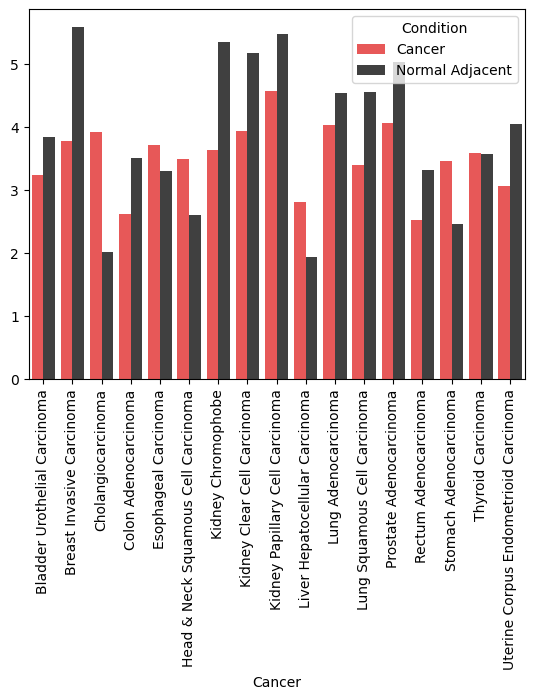

In [98]:
selected_transcripts = ['ENST00000046640', 'ENST00000064724']
exp_bplot = sns.barplot(data = ave_per_transcript_per_cancer, x='Cancer',
            y=ave_per_transcript_per_cancer[selected_transcripts].apply(lambda x: np.log2(np.sum(np.exp(x)-1)+1), axis=1),
            hue='Condition', alpha=0.75, palette=["r", "k"])
exp_bplot.set_xticks(exp_bplot.get_xticks(), exp_bplot.get_xticklabels(), rotation=90)

In [162]:
selected_expression

,ENST00000263741,ENST00000360001,ENST00000459994,ENST00000465727
index,,,,
GTEX-S4Q7-0003-SM-3NM8M,0.7146,5.3924,0.1903,-1.2142
TCGA-19-1787-01,2.3620,6.9667,-1.1172,-0.4921
TCGA-S9-A7J2-01,0.0990,5.3948,1.7489,-9.9658
GTEX-QV31-1626-SM-2S1QC,1.7446,6.4748,2.6278,-0.9971
TCGA-G3-A3CH-11,0.8726,5.8836,-1.8836,-9.9658
...,...,...,...,...
GTEX-11ZTS-3326-SM-5LU9Y,2.6019,6.2493,-9.9658,-0.6643
TCGA-DD-A115-01,1.9527,7.0944,2.8280,-9.9658
GTEX-ZA64-2126-SM-5Q5A8,2.5756,6.3036,-0.0725,-9.9658


In [173]:
selected_expression.min()

ENST00000263741   -9.9658
ENST00000360001   -9.9658
ENST00000459994   -9.9658
ENST00000465727   -9.9658
dtype: float64

In [183]:
        xena_expression.apply(lambda x: np.exp2(x).round(3)-0.001).min()

ENST00000046640    0.0
ENST00000064724    0.0
ENST00000075322    0.0
ENST00000084795    0.0
ENST00000175756    0.0
                  ... 
ENST00000630863    0.0
ENST00000630874    0.0
ENST00000631105    0.0
ENST00000631189    0.0
ENST00000631366    0.0
Length: 2020, dtype: float64

In [198]:
expression_table = {}
xena_metadata = xena_metadata.loc[xena_metadata._primary_site.dropna().index].copy()
for vtx_id in tqdm(df['vtx_id']):
    # Plot transcript expression levels
    selected_transcripts = vtx_id_to_transcripts[vtx_id]
    xena_overlap = xena_expression.columns.intersection(selected_transcripts)
    if len(xena_overlap)>=1:
        selected_expression = xena_expression[xena_overlap].copy()
        selected_expression = selected_expression.apply(lambda x: np.exp2(x).round(3)-0.001)
        groups = list(map(lambda x: '-'.join(map(str, x)), xena_metadata[['_study', '_primary_site', '_sample_type']].values))
        e = selected_expression.loc[xena_metadata.index].groupby(groups).mean().sum(axis=1)
        expression_table[vtx_id] = e
    else:
        expression_table[vtx_id] = [np.nan]*len(set(groups))
        # break

100%|██████████| 805/805 [00:43<00:00, 18.69it/s]


In [203]:
pd.DataFrame(expression_table).T.to_excel('sorf_expression_tcga_gtex_target.xlsx')

In [156]:
xena_metadata.loc[~(xena_metadata[['_study', '_primary_site', '_sample_type']].isna())]

ValueError: Cannot index with multidimensional key

In [143]:
groups

['Blood-GTEX',
 'Brain-TCGA',
 'Brain-TCGA',
 'Blood Vessel-GTEX',
 'Liver-TCGA',
 'Uterus-GTEX',
 'Thyroid-GTEX',
 'Blood Vessel-GTEX',
 'Cervix-TCGA',
 'Colon-TCGA',
 'Brain-TCGA',
 'Blood Vessel-GTEX',
 'Lining of body cavities-TCGA',
 'Skin-TCGA',
 'Muscle-GTEX',
 'Lung-GTEX',
 'Skin-GTEX',
 'Lung-TCGA',
 'Muscle-GTEX',
 'Colon-GTEX',
 'Testis-TCGA',
 'Nerve-GTEX',
 'Soft tissue,Bone-TCGA',
 'Kidney-TCGA',
 'Breast-TCGA',
 'Skin-GTEX',
 'Nerve-GTEX',
 'Prostate-TCGA',
 'Stomach-TCGA',
 'Esophagus-TCGA',
 'Skin-TCGA',
 'Kidney-TCGA',
 'White blood cell-TARGET',
 'Brain-GTEX',
 'Blood-GTEX',
 'Kidney-TCGA',
 'Thyroid-GTEX',
 'Brain-TCGA',
 'Soft tissue,Bone-TCGA',
 'Stomach-TCGA',
 'Prostate-TCGA',
 'Breast-TCGA',
 'Lung-GTEX',
 'Head and Neck region-TCGA',
 'Prostate-TCGA',
 'Muscle-GTEX',
 'Cervix-TCGA',
 'Brain-TCGA',
 'Thyroid-GTEX',
 'Kidney-TCGA',
 'Ovary-TCGA',
 'Kidney-TCGA',
 'Prostate-TCGA',
 'Skin-TCGA',
 'Blood Vessel-GTEX',
 'Lung-GTEX',
 'Colon-TCGA',
 'Breast-TCGA',
 '